<a href="https://colab.research.google.com/github/kattanavya18/Number-plate-detection-using-easyocr-python/blob/main/ANPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install easyocr
!pip install imutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 9.9 MB/s eta 0:00:00


In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

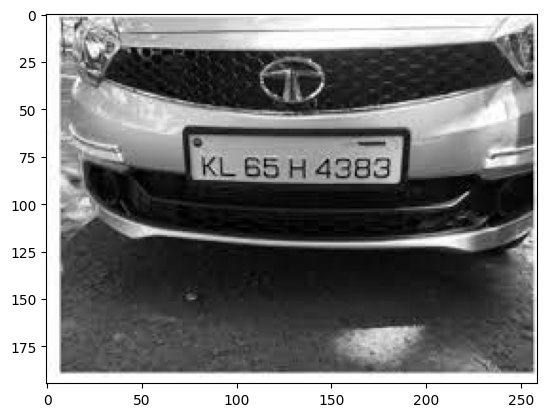

In [19]:
img=cv2.imread('img2.jpeg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

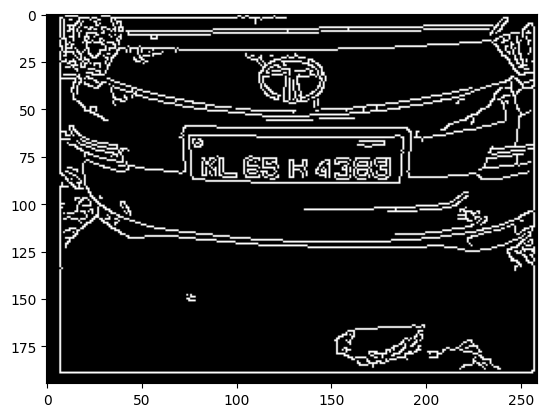

In [20]:
bfilter=cv2.bilateralFilter(gray,11,17,17)
edged=cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [21]:
keypoints=cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [22]:
location=None
for contour in contours:

  approx=cv2.approxPolyDP(contour, 10, True)
  if len(approx)==4:

    location=approx
    break

In [23]:
location

array([[[ 75,  64]],

       [[ 77,  87]],

       [[187,  85]],

       [[186,  64]]], dtype=int32)

In [24]:
mask= np.zeros(gray.shape, np.uint8)
new_image= cv2.drawContours(mask, [location], 0, 255, -1)
new_image=cv2.bitwise_and(img, img, mask=mask)

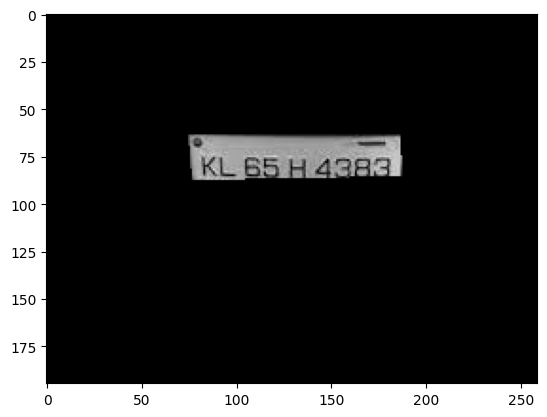

In [25]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [26]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x), np.min(y))
(x2,y2)=(np.max(x), np.max(y))
cropped_image=gray[x1:x2+1, y1:y2+1]

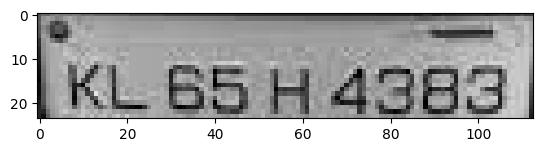

In [27]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [28]:
reader= easyocr.Reader(['en'])
result=reader.readtext(cropped_image)
result

[([[3, 7], [111, 7], [111, 24], [3, 24]], 'KL 65 H 4383', 0.6312339272678748)]

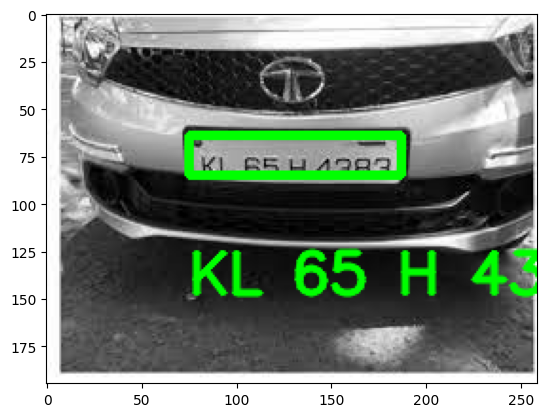

In [31]:
text= result[0][-2]
font=cv2.FONT_HERSHEY_SIMPLEX
res=cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60),fontFace=font,fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res=cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))